In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader.data as web 
import datetime
import quandl
import plotly 
import pandas as pd
import plotly.graph_objects as go 
import datetime as dt
import statsmodels.api as sm
import plotly.express as px
import cufflinks as cf
import seaborn as sns 
import mplfinance as mpf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline 


In [128]:
init_notebook_mode(connected=True)

In [129]:
import statsmodels.api as sm

In [130]:
cf.go_offline()

In [131]:
#start = datetime.datetime(2012, 1, 1)
#end = datetime.datetime.now().date()
eth = 'ETH'
btc = 'BTC'
matic = 'MATIC'
usd = 'USD'

In [132]:
start = dt.datetime(2021, 1,1)
end = dt.datetime.now()

In [133]:
eth_data = web.DataReader(f'{eth}-{usd}', 'yahoo', start, end)

In [134]:
btc_data = web.DataReader(f'{btc}-{usd}', 'yahoo', start, end)

In [135]:
matic_data = web.DataReader(f'{matic}-{usd}', 'yahoo', start, end)

In [136]:
matic_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,2.731782,2.476153,2.501931,2.679163,3779826295,2.679163
2021-12-24,2.682404,2.429210,2.682404,2.467273,2071968314,2.467273
2021-12-25,2.686738,2.442000,2.470144,2.636828,1544073308,2.636828
2021-12-26,2.888085,2.617657,2.639664,2.876757,3214825308,2.876757
2021-12-27,2.910213,2.803059,2.896032,2.813547,2480242944,2.813547


In [137]:
eth_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


In [138]:
eth_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,4149.026855,3897.234375,3981.961670,4108.015625,18007273742,4108.015625
2021-12-24,4134.106445,4029.064453,4111.345215,4047.982910,12769090623,4047.982910
2021-12-25,4138.564941,4027.927002,4049.781982,4093.281006,10894785525,4093.281006
2021-12-26,4105.023926,4013.026367,4094.151611,4067.328125,11197244172,4067.328125
2021-12-27,4088.507568,4034.531738,4070.286377,4040.979736,9778233344,4040.979736


In [139]:
fig = px.line(eth_data, y="Close", 
              title="ETH Price") 
# width=700, height=500
fig.show()

In [140]:
fig = px.line(eth_data, y="Volume", title="ETH Traded Volume")
fig.show()

In [141]:
eth_data['Volume'].max()

84482912776

In [142]:
(eth_data[eth_data['Volume']== eth_data['Volume'].max()].index)

DatetimeIndex(['2021-05-19'], dtype='datetime64[ns]', name='Date', freq=None)

In [143]:
# https://www.reuters.com/technology/bitcoin-ethereum-plunge-crypto-market-cap-losses-nearly-1-trillion-2021-05-19/

In [144]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2021-01-01 to 2021-12-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       361 non-null    float64
 1   Low        361 non-null    float64
 2   Open       361 non-null    float64
 3   Close      361 non-null    float64
 4   Volume     361 non-null    int64  
 5   Adj Close  361 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.7 KB


In [145]:
# Create a new colum called total traded

In [146]:
eth_data['Total Traded'] = eth_data['Open'] * eth_data['Volume']

In [147]:
fig = px.line(eth_data, y="Total Traded", title="ETH Total Traded Volume")
fig.show()


In [148]:
# Plot the moving average for BTC

In [149]:
eth_data['MA20'] = eth_data['Close'].rolling(window=20).mean()
eth_data['MA50'] = eth_data['Close'].rolling(window=50).mean()
eth_data[['Open', 'MA20', 'MA50']].iplot();

In [150]:
# Let's go ahead and create a Boligner Band - Indicator of volatility

In [151]:
# Upper = 20MA + 2 * std(20)  Indicator of volatility
eth_data['Upper'] = eth_data['MA20'] + 2 * (eth_data['Close'].rolling(20).std())
# Lower = 20MA - 2 * std(20)
eth_data['Lower'] = eth_data['MA20'] - 2 * (eth_data['Close'].rolling(20).std())
# Close 

In [152]:
eth_data[['Close', 'MA20', 'Upper', 'Lower']].iplot()

In [153]:
# If you want to focus on the last 200 days do this:

In [154]:
eth_data[['Close', 'MA20', 'Upper', 'Lower']].tail(200).iplot()

In [155]:
coin_comp= pd.concat([btc_data['Open'], eth_data['Open'], matic_data['Open']], axis=1)

In [156]:
coin_comp.columns = ["BTC Open", "ETH Open", "MATIC Open"]

In [157]:
coin_comp.head()

,BTC Open,ETH Open,MATIC Open
Date,,,
2021-01-01,28994.009766,737.708374,0.017633
2021-01-02,29376.455078,730.402649,0.017812
2021-01-03,32129.408203,774.511841,0.019053
2021-01-04,32810.949219,977.058838,0.020000
2021-01-05,31977.041016,1041.498779,0.024675


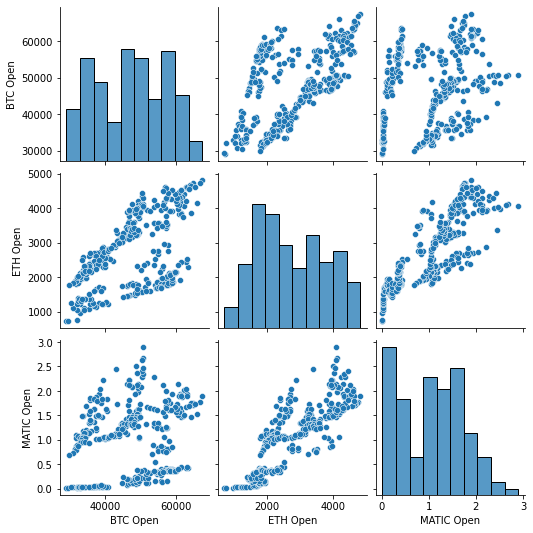

In [158]:
sns.pairplot(coin_comp);

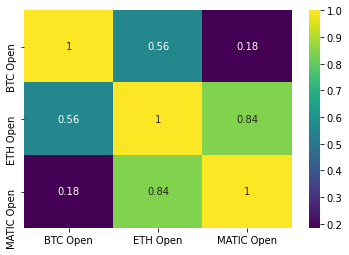

In [159]:
sns.heatmap(coin_comp.corr(), cmap='viridis', annot=True);

In [160]:
#from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY


In [161]:
# Financial Indicators - Daily Percentage Change

In [162]:
btc_data['returns'] = (btc_data['Close'] / btc_data['Close'].shift(1) ) - 1

In [163]:
btc_data['returns']

Date
2021-01-01         NaN
2021-01-02    0.093726
2021-01-03    0.020380
2021-01-04   -0.024712
2021-01-05    0.063197
                ...   
2021-12-23    0.044337
2021-12-24    0.000741
2021-12-25   -0.007720
2021-12-26    0.007528
2021-12-27   -0.004738
Name: returns, Length: 361, dtype: float64

In [164]:
btc_data['returns'] = btc_data['Close'].pct_change(1)
eth_data['returns'] = eth_data['Close'].pct_change(1)
matic_data['returns'] = matic_data['Close'].pct_change(1)


In [165]:
btc_data['returns']

Date
2021-01-01         NaN
2021-01-02    0.093726
2021-01-03    0.020380
2021-01-04   -0.024712
2021-01-05    0.063197
                ...   
2021-12-23    0.044337
2021-12-24    0.000741
2021-12-25   -0.007720
2021-12-26    0.007528
2021-12-27   -0.004738
Name: returns, Length: 361, dtype: float64

In [166]:
#btc_data['returns'].iplot(kind='hist')

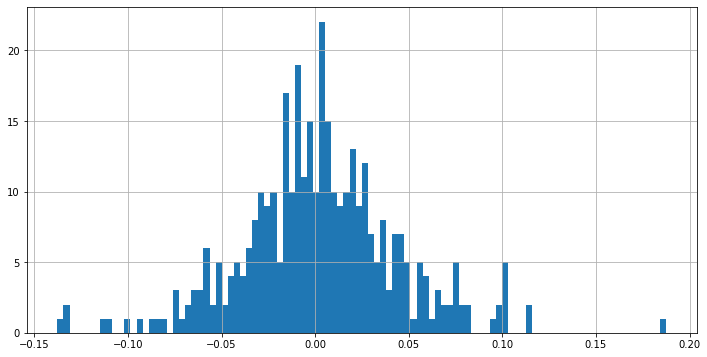

In [167]:
btc_data['returns'].hist(bins=100, figsize=(12, 6));

<AxesSubplot:>

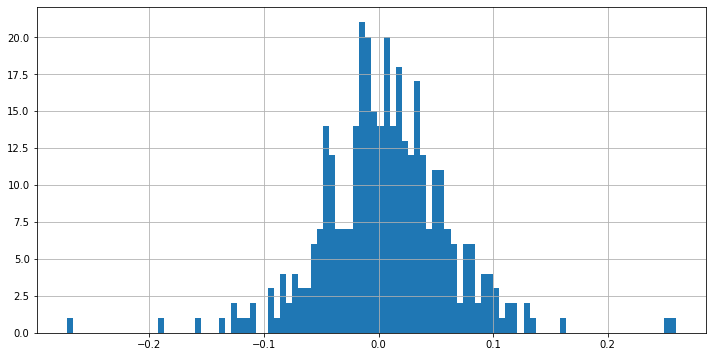

In [168]:
#eth_data['returns'].iplot(kind='hist')
eth_data['returns'].hist(bins=100, figsize=(12, 6))

<AxesSubplot:>

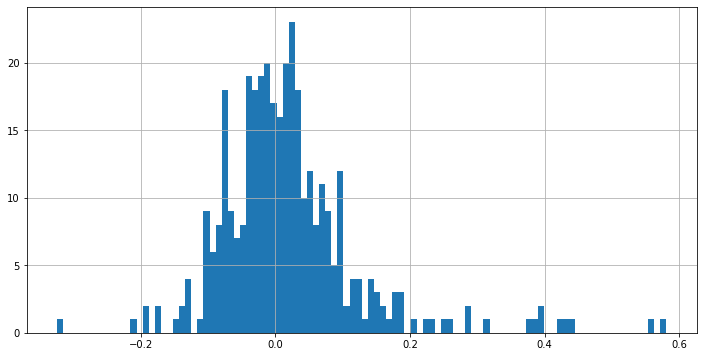

In [169]:
#matic_data['returns'].iplot(kind='hist')
matic_data['returns'].hist(bins=100, figsize=(12, 6))

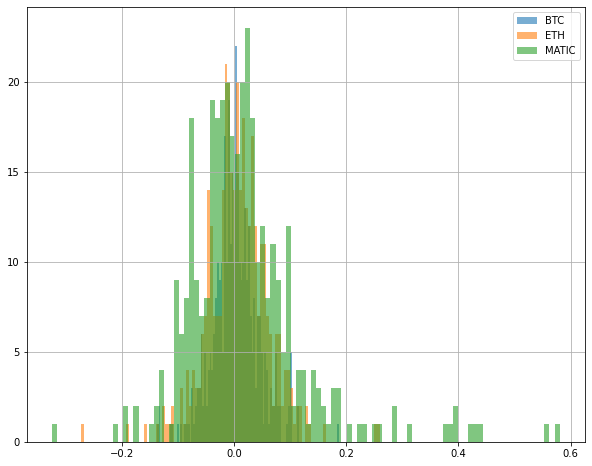

In [170]:
btc_data['returns'].hist(bins=100, label='BTC', figsize=(10,8), alpha=0.6)
eth_data['returns'].hist(bins=100, label='ETH', figsize=(10,8), alpha = 0.6)
matic_data['returns'].hist(bins=100, label='MATIC', figsize=(10,8), alpha = 0.6)
plt.legend();

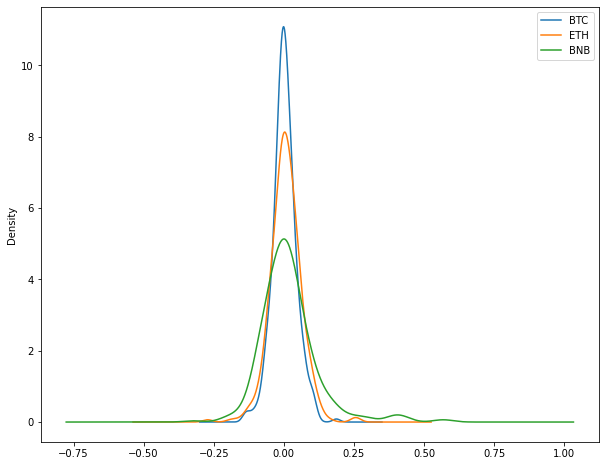

In [171]:
btc_data['returns'].plot(kind='kde', label='BTC', figsize=(10,8))
eth_data['returns'].plot(kind='kde', label='ETH', figsize=(10,8))
matic_data['returns'].plot(kind ='kde', label='BNB', figsize=(10,8))
plt.legend();

In [172]:
box_df = pd.concat([btc_data['returns'], eth_data['returns'], matic_data['returns']], axis=1)

In [173]:
box_df.head()

,returns,returns,returns
Date,,,
2021-01-01,NaN,NaN,NaN
2021-01-02,0.093726,0.060473,0.069111
2021-01-03,0.020380,0.259475,0.048942
2021-01-04,-0.024712,0.066350,0.232240
2021-01-05,0.063197,0.057461,-0.005972


In [174]:
box_df.columns = ['BTC Returns', 'ETH Returns', 'MATIC Returns']

In [175]:
box_df.head()

,BTC Returns,ETH Returns,MATIC Returns
Date,,,
2021-01-01,NaN,NaN,NaN
2021-01-02,0.093726,0.060473,0.069111
2021-01-03,0.020380,0.259475,0.048942
2021-01-04,-0.024712,0.066350,0.232240
2021-01-05,0.063197,0.057461,-0.005972


In [176]:
import plotly.express as px
fig = px.box(box_df)
fig.show()

In [177]:
# Cummulative daily return for each coin

In [178]:
btc_data["Cumulative Return"] = (1 + btc_data['returns']).cumprod()

In [179]:
btc_data.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344,NaN,NaN
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578,0.093726,1.093726
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438,0.020380,1.116016
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062,-0.024712,1.088437
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688,0.063197,1.157222


In [180]:
eth_data["Cumulative Return"] = (1 + eth_data['returns']).cumprod()

In [181]:
eth_data.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Upper,Lower,returns,Cumulative Return
Date,,,,,,,,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554,1.007120e+13,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973,1.441871e+13,NaN,NaN,NaN,NaN,0.060473,1.060473
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690,3.500829e+13,NaN,NaN,NaN,NaN,0.259475,1.335639
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032,5.563958e+13,NaN,NaN,NaN,NaN,0.066350,1.424260
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104,4.325962e+13,NaN,NaN,NaN,NaN,0.057461,1.506099


In [182]:
matic_data["Cumulative Return"] = (1 + matic_data['returns']).cumprod()

In [183]:
matic_data.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2021-01-01,0.018774,0.017454,0.017633,0.017812,9798566,0.017812,NaN,NaN
2021-01-02,0.019600,0.017331,0.017812,0.019043,17374970,0.019043,0.069111,1.069111
2021-01-03,0.020570,0.018910,0.019053,0.019975,17908526,0.019975,0.048942,1.121435
2021-01-04,0.024831,0.019763,0.020000,0.024614,44212481,0.024614,0.232240,1.381877
2021-01-05,0.027025,0.023680,0.024675,0.024467,58583192,0.024467,-0.005972,1.373625


In [184]:
# Cumulative Return if you invest 1 dollar in the company.
returns_comp = pd.concat([btc_data['Cumulative Return'], 
                          eth_data['Cumulative Return'],
                          matic_data['Cumulative Return']], axis=1)


In [185]:
returns_comp.columns = ['BTC Returns', 'ETH Returns', 'MATIC Returns']

In [186]:
returns_comp.head()

,BTC Returns,ETH Returns,MATIC Returns
Date,,,
2021-01-01,NaN,NaN,NaN
2021-01-02,1.093726,1.060473,1.069111
2021-01-03,1.116016,1.335639,1.121435
2021-01-04,1.088437,1.424260,1.381877
2021-01-05,1.157222,1.506099,1.373625


In [187]:
returns_comp[['BTC Returns', 'ETH Returns', 'MATIC Returns']].iplot()

In [188]:
# Hodrick-Prescott filter separates a time series y_t into a trend T_t
# and a cyclical component C_t

In [189]:
eth_cycle, eth_trend = sm.tsa.filters.hpfilter(eth_data.Close)

In [190]:
eth_data['Trend'] = eth_trend

In [191]:
eth_data['Cycle'] = eth_cycle

In [192]:
eth_data[['Close', 'Trend', 'Cycle']]["2021-01-01":].iplot()

In [193]:
# Candle Plot for December 2021

In [194]:
eth_reset = eth_data.loc['2021-12']

In [195]:
eth_reset.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Upper,Lower,returns,Cumulative Return,Trend,Cycle
Date,,,,,,,,,,,,,,,
2021-12-01,4780.732422,4530.272461,4623.679688,4586.990234,27634826695,4586.990234,1.277746e+14,4350.740698,4284.093794,4777.976866,3923.504530,-0.009606,6.280386,4266.456497,320.533737
2021-12-02,4628.919922,4441.507812,4586.333008,4511.302246,21502671027,4511.302246,9.861841e+13,4342.950049,4302.195806,4751.153896,3934.746202,-0.016501,6.176756,4253.521833,257.780414
2021-12-03,4647.289062,4100.145508,4514.355957,4220.706055,25879591528,4220.706055,1.168297e+14,4321.412329,4310.889644,4705.841302,3936.983356,-0.064415,5.778879,4239.238679,-18.532624
2021-12-04,4242.725586,3525.494141,4227.762207,4119.587402,38478999182,4119.587402,1.626801e+14,4296.073755,4316.028696,4662.243632,3929.903878,-0.023958,5.640430,4223.784976,-104.197574
2021-12-05,4246.923340,4040.217529,4119.628906,4198.322754,25533062707,4198.322754,1.051867e+14,4278.114697,4323.387510,4625.023082,3931.206313,0.019112,5.748233,4207.327083,-9.004329


In [196]:
eth_reset = eth_reset.reset_index()

In [197]:
eth_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Upper,Lower,returns,Cumulative Return,Trend,Cycle
0,2021-12-01,4780.732422,4530.272461,4623.679688,4586.990234,27634826695,4586.990234,1.277746e+14,4350.740698,4284.093794,4777.976866,3923.504530,-0.009606,6.280386,4266.456497,320.533737
1,2021-12-02,4628.919922,4441.507812,4586.333008,4511.302246,21502671027,4511.302246,9.861841e+13,4342.950049,4302.195806,4751.153896,3934.746202,-0.016501,6.176756,4253.521833,257.780414
2,2021-12-03,4647.289062,4100.145508,4514.355957,4220.706055,25879591528,4220.706055,1.168297e+14,4321.412329,4310.889644,4705.841302,3936.983356,-0.064415,5.778879,4239.238679,-18.532624
3,2021-12-04,4242.725586,3525.494141,4227.762207,4119.587402,38478999182,4119.587402,1.626801e+14,4296.073755,4316.028696,4662.243632,3929.903878,-0.023958,5.640430,4223.784976,-104.197574
4,2021-12-05,4246.923340,4040.217529,4119.628906,4198.322754,25533062707,4198.322754,1.051867e+14,4278.114697,4323.387510,4625.023082,3931.206313,0.019112,5.748233,4207.327083,-9.004329


In [198]:
fig = go.Figure(data = [go.Candlestick(x=eth_reset['Date'],
                                open=eth_reset['Open'], high= eth_reset['High'],
                                low = eth_reset['Low'], close = eth_reset['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False, template="plotly_dark")
fig.update_layout(yaxis_title = 'Ethereum Price, December 2001 (USD)', xaxis_title = 'Date')